#### Final Report: Group #21

## **Inferential Analysis on the Adoption Time of Dogs and Cats from the Austin Animal Center**
#### _Group Members: Sadia, Youjung, Adam_

First, let's retrieve the necessary packages.

In [25]:
install.packages("infer")
library(infer)
install.packages("cowplot")
library(cowplot)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



# **_Introduction_**

**Question: How long does it take for cats and dogs to get adopted and are dogs adopted faster than cats are?**

new intro goes here...

# **_Methods & Results_**

#### Preliminary Results:

In [26]:
#Source of datasets
intakes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Intakes.csv"
outcomes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Outcomes.csv"

#Reading and displaying data sets
animal_intakes <- read_csv(intakes)
head(animal_intakes)

animal_outcomes <- read_csv(outcomes)
head(animal_outcomes)

Rows: 142192 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Found Location, Intake Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NA,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


Rows: 141980 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Date of Birth, Outcome Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NA,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NA,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NA,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NA,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NA,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NA,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NA,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In order to analyze the datasets, we must first tidy it. This included changing column names, filtering rows, and selecting columns relevant to later analysis.

In [27]:
#Renaming columns so that they can be read in R. Column names with spaces cannot be easily read.
names(animal_intakes)<-str_replace_all(names(animal_intakes), c(" " = "_" , "," = "" ))
names(animal_outcomes)<-str_replace_all(names(animal_outcomes), c(" " = "_" , "," = "" ))

#Filtering Intake dataset for useful data and selecting relevant columns
tidy_animal_intakes <- animal_intakes %>%
    filter(Animal_Type%in%c("Dog", "Cat")) %>%
    dplyr::rename(DateTime_Intake = DateTime) %>%
    select(Animal_ID, Animal_Type, DateTime_Intake)

#Filtering Outcome dataset for useful data and selecting relevant columns
tidy_animal_outcomes <- animal_outcomes %>%
    filter(Animal_Type%in%c("Dog", "Cat") & Outcome_Type == "Adoption") %>%
    dplyr::rename(DateTime_Outcome = DateTime) %>%
    select(Animal_ID, DateTime_Outcome)


head(tidy_animal_intakes)
head(tidy_animal_outcomes)

Animal_ID,Animal_Type,DateTime_Intake
<chr>,<chr>,<chr>
A786884,Dog,01/03/2019 04:19:00 PM
A706918,Dog,07/05/2015 12:59:00 PM
A724273,Dog,04/14/2016 06:43:00 PM
A665644,Cat,10/21/2013 07:59:00 AM
A682524,Dog,06/29/2014 10:38:00 AM
A743852,Dog,02/18/2017 12:46:00 PM


Animal_ID,DateTime_Outcome
<chr>,<chr>
A776359,07/18/2018 04:02:00 PM
A720371,02/13/2016 05:59:00 PM
A659412,10/05/2020 02:37:00 PM
A814515,05/06/2020 07:59:00 AM
A689724,10/18/2014 06:52:00 PM
A680969,08/05/2014 04:59:00 PM


To get time spent at the shelter, the two datasets were first combined using Animal_ID, and then filtered.

In [28]:
#Merge Intake and Outcome Datasets. Using DateTime_Outcome and DateTime_Intake, Shelter_Period was calculated.
adoption_time_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
    filter(!is.na(DateTime_Outcome)) %>%
    mutate(DateTime_Outcome = as.Date(DateTime_Outcome, format = "%m/%d/%Y"),
          DateTime_Intake = as.Date(DateTime_Intake, format = "%m/%d/%Y"),
          Shelter_Period = as.numeric(difftime(DateTime_Outcome, DateTime_Intake, unit = "days"))) %>%
#Negative numbers were animals returned to the shelter, not relevant to our analysis
    filter(Shelter_Period >= 0) %>%
    select(Animal_Type, Shelter_Period)

head(adoption_time_data)

,Animal_Type,Shelter_Period
,<chr>,<dbl>
1,Dog,50
2,Dog,9
3,Dog,23
4,Dog,90
5,Dog,3
6,Dog,147


**_Table 1: Tidy Dog and Cat Shelter Period Data_**

In order to analyze the data, samples of size 200 were created for dogs and cats. We decided on sample size of 200 because it is a common size taken in real-life studies. 

In [29]:
options(repr.plot.width = 10)
set.seed(310)

# Get datasets filtered by species
adoption_time_data_dog <- adoption_time_data %>%
    filter(Animal_Type == "Dog")

adoption_time_data_cat <- adoption_time_data %>%
    filter(Animal_Type == "Cat")

# Dog: Sample (size 200)
dog_sample_200 <- adoption_time_data_dog %>%
    rep_sample_n(size = 200) 

#Cat: Sample (size 200)
cat_sample_200 <- adoption_time_data_cat %>%
    rep_sample_n(size = 200) 


In [30]:
# Dog: Sample200 histogram
options(repr.plot.width = 15)
animal_sample200_dog_dist <- dog_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Dogs spent in Shelter Before Adoption") +
                            geom_vline(xintercept = 10.00, colour = "red")

In [31]:
# Cat: Sample200 histogram
options(repr.plot.width = 15)
animal_sample200_cat_dist <- cat_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Cats spent in Shelter Before Adoption") +
                            geom_vline(xintercept = 33.50, colour = "red")

Below, we plot the distributions together with the median illustrated with the red vertical line.

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


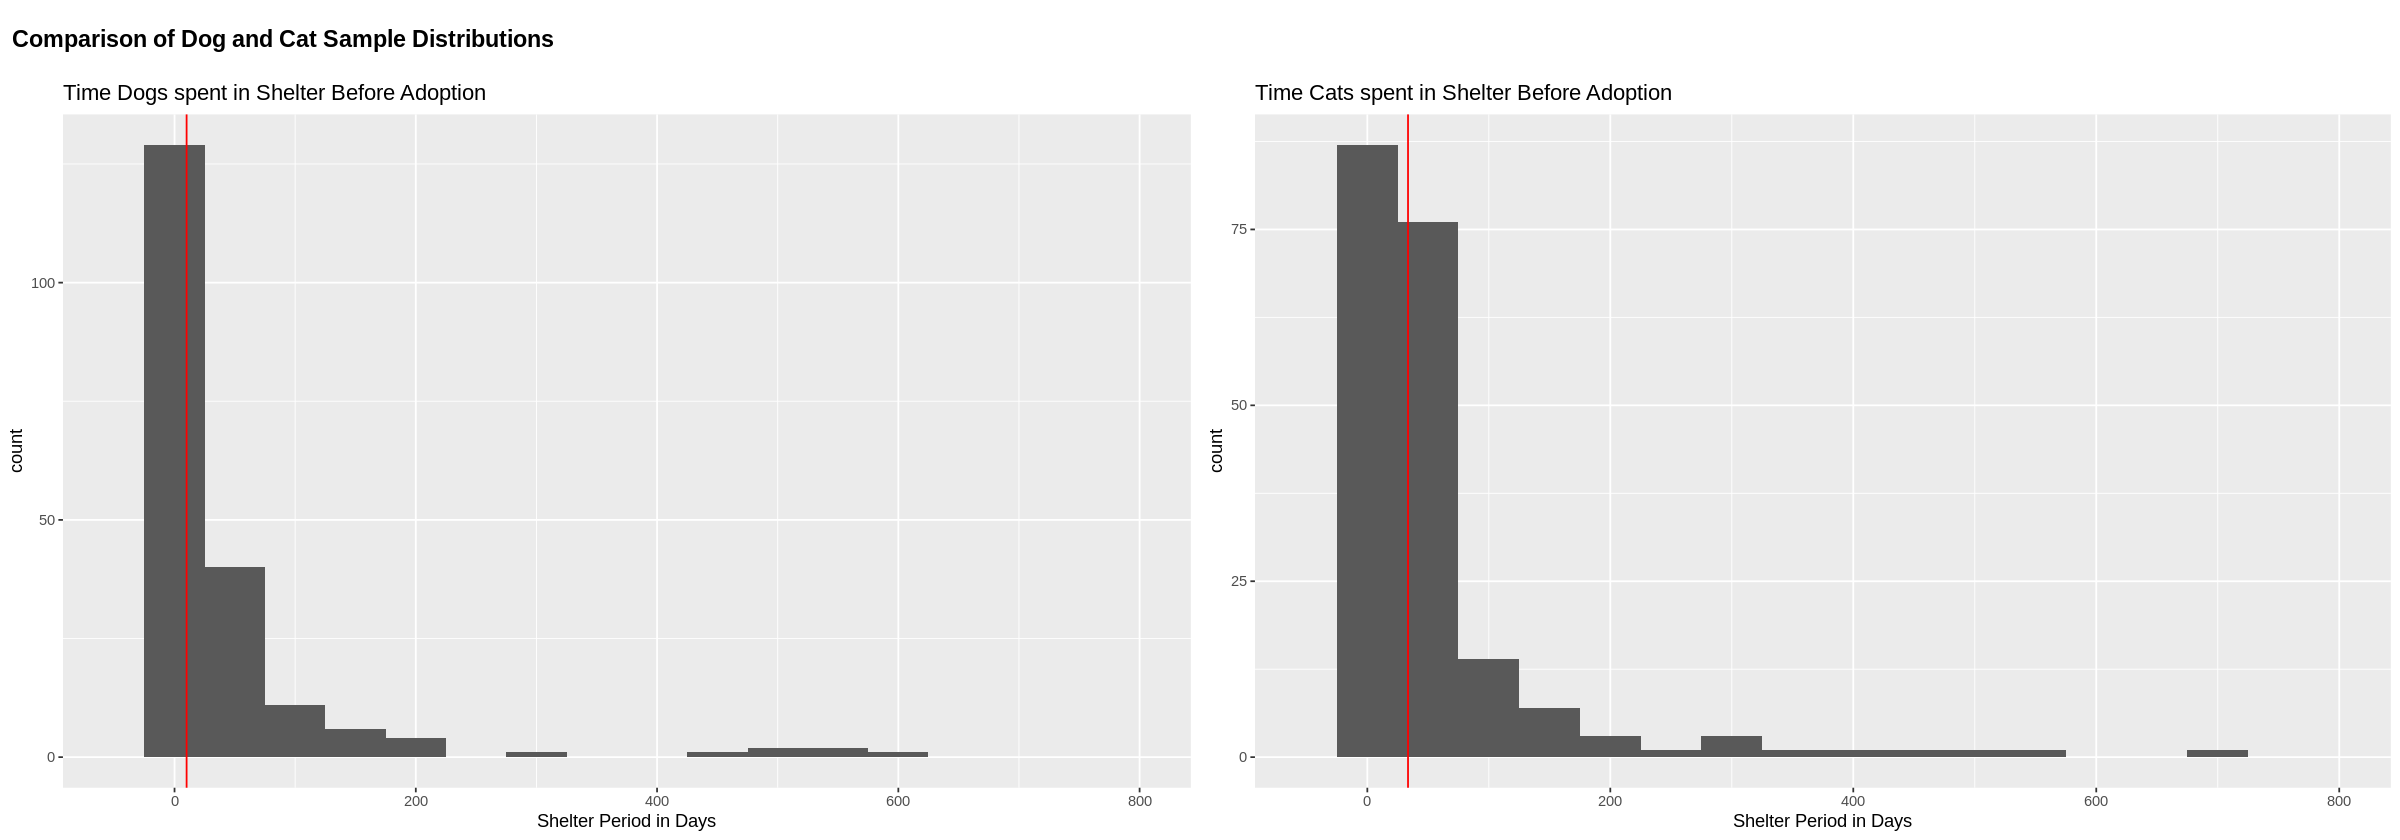

In [32]:
options(repr.plot.width = 20)

#Plotting Cat and Dog histograms side by side
proportion_plot_row <- plot_grid(animal_sample200_dog_dist +
                                 scale_x_continuous(limits = c(-50, 800)),
                                 animal_sample200_cat_dist +
                                 scale_x_continuous(limits = c(-50, 800)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of Dog and Cat Sample Distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

samples_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

#Some points will not be plotted, in order to make comparison clearer
samples_grid

| _Figure 1: Comparing the Distributions of Time spent in Shelter for **Dogs** and **Cats**_|
| ------------------------ |
||

In Figure 1, it is clear that for both distributions the data is asymmetrical and heavily skewed toward the right with outliers. In order to get a better understanding of the spread, we look at the IQR of the two samples:

In [33]:
#IQR of Dog Sample
summary(dog_sample_200$Shelter_Period)
sprintf("Dog IQR: %.2f", IQR(dog_sample_200$Shelter_Period))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   10.00   63.16   41.00 1404.00 

[1] "Dog IQR: 36.00"

In [34]:
#IQR of Cat Sample
summary(cat_sample_200$Shelter_Period)
sprintf("Cat IQR: %.2f", IQR(cat_sample_200$Shelter_Period))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.75   33.50   74.30   61.00 1914.00 

[1] "Cat IQR: 52.25"

The IQR of the cat sample is larger than that of the dog sample. However, this alone is not enough information. To get a more hollistic picture of the spread, the data is plotted using a boxplot which will clearly depict the IQR range and give us more insight into the outliers present.

In [35]:
# Dog: Sample200 Boxplot
options(repr.plot.width = 10)
dog_sample_200_boxplot <- dog_sample_200 %>%
                            ggplot(aes(x = Animal_Type, y = Shelter_Period)) +
                            geom_boxplot() +
                            labs(x = "Dogs", y = "Shelter Period in Days", 
                                 title = "Time Dogs spent in Shelter Before Adoption")

In [36]:
options(repr.plot.width = 10)
cat_sample_200_boxplot <- cat_sample_200 %>%
                            ggplot(aes(x = Animal_Type, y = Shelter_Period)) +
                            geom_boxplot() +
                            labs(x = "Cats", y = "Shelter Period in Days", 
                                 title = "Time Cats spent in Shelter Before Adoption")

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


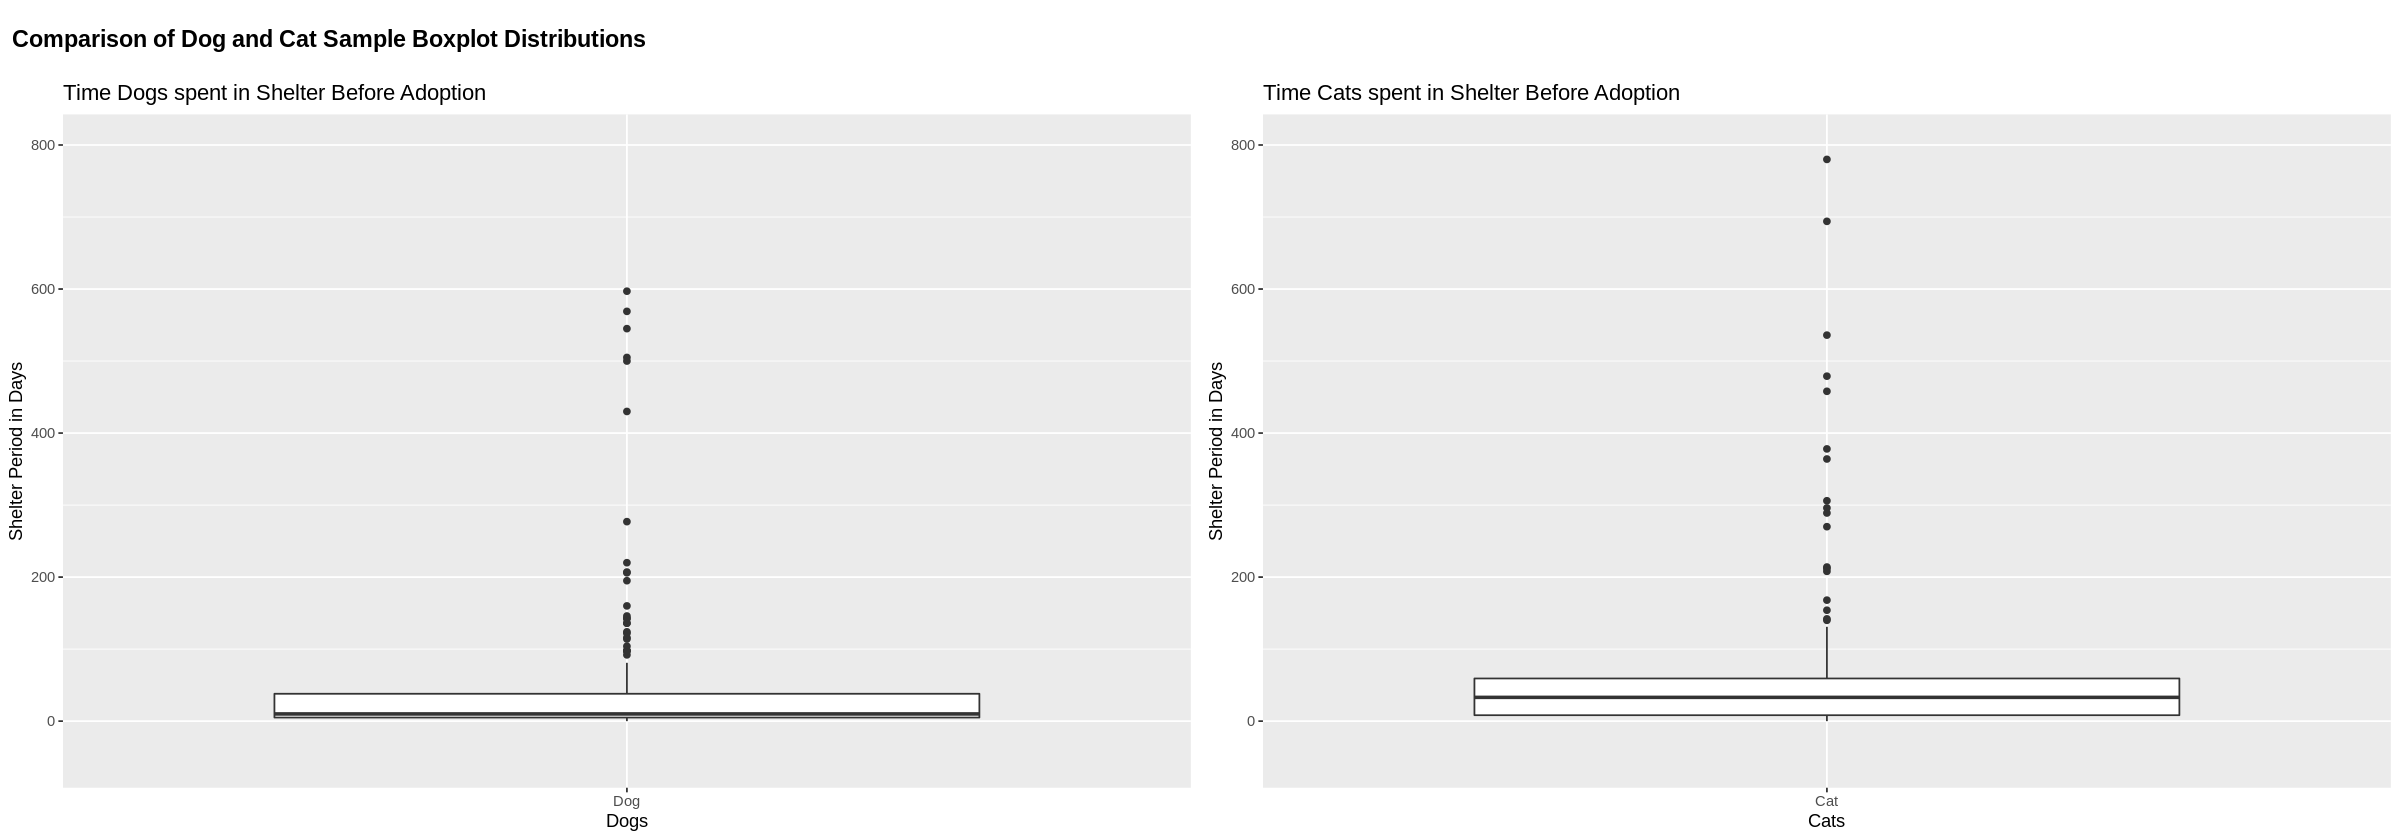

In [37]:
options(repr.plot.width = 20)

#Plotting Cat and Dog Boxplots side by side
proportion_plot_row <- plot_grid(dog_sample_200_boxplot +
                                 scale_y_continuous(limits = c(-50, 800)),
                                 cat_sample_200_boxplot +
                                 scale_y_continuous(limits = c(-50, 800)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of Dog and Cat Sample Boxplot Distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

#Some points will not be plotted, in order to make comparison clearer
medians_grid

Figure _ shows that our data is heavily skewed to the right. As such, population parameters like the mean and standard deviation will be heavily affected unless outliers are eliminated. As a result, we will first look at median instead of mean. Below we calculate the median of the cat and dog samples and summarize the point estimates calculated in a table.

In [38]:
#Dog: Sample median calculated
sample_dog_median <- dog_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Dog median for 200 samples: %.2f", sample_dog_median)

#Cat: Sample median calculated
sample_cat_median <- cat_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

sprintf("Cat median for 200 samples: %.2f", sample_cat_median)

difference_in_median <- sample_dog_median - sample_cat_median

#Difference in medians
difference_in_median
sprintf("The difference in the dog and cat medians is: %.2f", difference_in_median)

[1] "Dog median for 200 samples: 10.00"

[1] "Cat median for 200 samples: 33.50"

[1] -23.5

[1] "The difference in the dog and cat medians is: -23.50"

|  Point Estimates        |    Dogs   |   Cats    | Difference in Point Estimates (If Applicable)|
| -------- | --------- | --------- | --------- |
| IQR (days)      |  36.00 | 52.25 | N/A |
| Median (days)   | 10.00 | 33.50| -23.5|

| _Table 2: Point Estimates of Population Parameters_ |
| ------------------------ |
||

Table 2 shows that contrary to research done in Malaysia, the average time it takes for a dog to get adopted is faster than the time it takes for a cat by 23.5 days. Our preliminary testing of the point estimates would suggest that the average time dogs and cats take to get adopted is different. However, we will need to conduct hypothesis testing to ensure this fact. 

## _Hypothesis Testing:_

- We want to compare the median of time spent at the center for both dogs and cats. In order to achieve this, we want to test the null hypothesis $H_0$ against our alternative hypothesis $H_1$. We cannot use asymptotics to find the median, so our hypothesis testing will use bootstrapping.

Our 2 sample medians:

$m_0$ = median adoption time of dogs

$m_1$ = median adoption time of cats

Using the metric, we define our hypotheses:

**Null Hypothesis: The median adoption time for cats and dogs is the same**
- **$H_0$: $m_0$ - $m_1$ = 0**

**Alternative Hypothesis: The median adoption time for cats and dogs is different**
- **$H_1$: $m_0$ - $m_1$ ≠ 0**

We plan to use a a significance level of 0.05 (5%) for our hypothesis testing.

**Observed Test Statistic:** first, we find the observed test statistic which is the median adoption time of dogs subtracted by the median adoption time of cats. We do this by first combining our cat and dog samples into a single larger animal sample.

In [39]:
# Dog&Cat: Combine the two sample
animal_sample <- rbind(cat_sample_200, dog_sample_200)

# observed difference in period median

obs_diff_median <- animal_sample %>%
    specify(Shelter_Period ~ Animal_Type) %>%
    calculate(stat = "diff in medians", order = c("Dog","Cat")) %>%
    pull()

obs_diff_median

[1] -23.5

Now that we have our test statistic, we can move on to creating a null distribution based on our null hypothesis.

**Bootstrap Sampling Distribution for Null Hypothesis:**

replicate,stat
<int>,<dbl>
1,2.5
2,1.0
3,8.5
4,-0.5
5,1.0
6,1.0


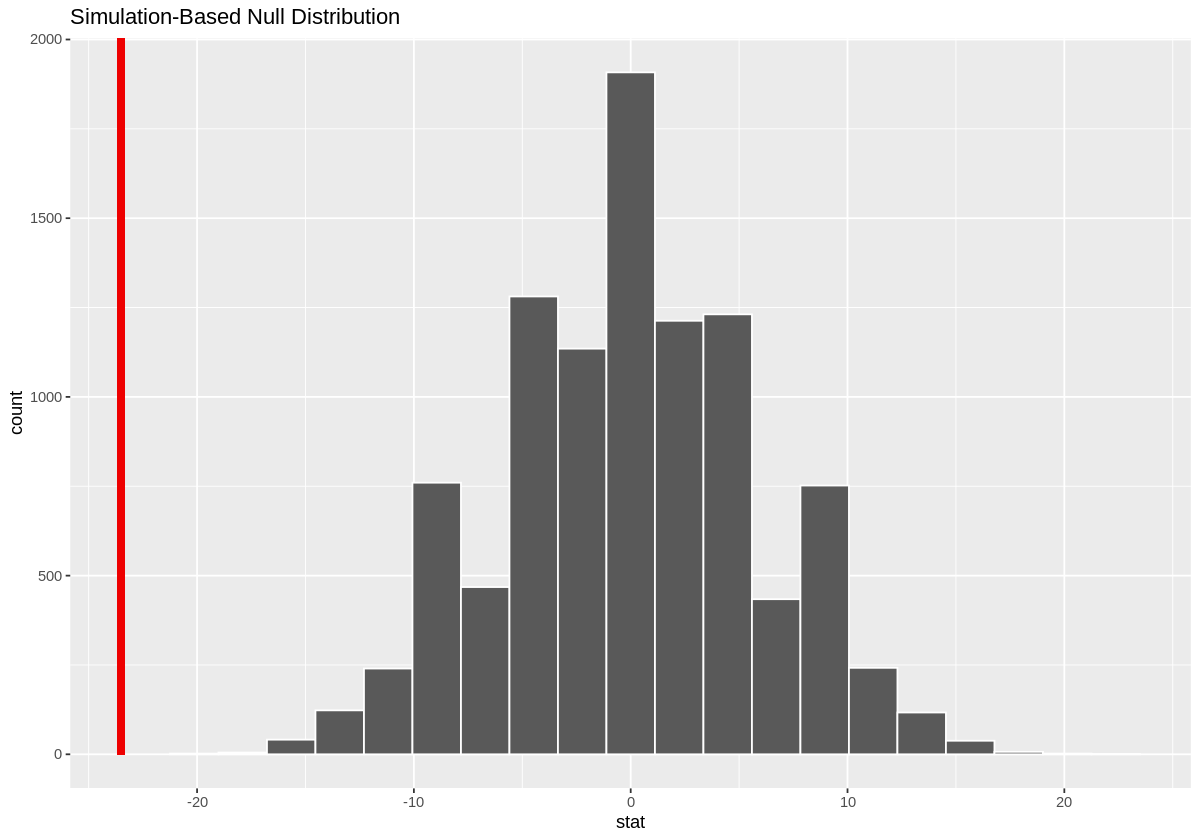

In [40]:
# Hypothesis Testing
set.seed(310)
options(repr.plot.width = 10)

# Dog&Cat: Compute resulting 10000 replicates of median
null_distribution <- animal_sample %>%
    specify(formula = Shelter_Period ~ Animal_Type) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in medians", order = c("Dog","Cat"))

head(null_distribution)

# Null Distribution with P Value visualization 
null_model <- null_distribution %>%
    visualize(bins = 20) +
    shade_p_value(obs_stat = obs_diff_median, direction = "both")
null_model

As Figure _ shows, our observed test statistic is extremely unlikely to happen under the conditions of the null model where the median adoption time for cats and dogs is the same. The exact p value is calculated below.

**P_value:**

In [41]:
null_distribution_p <- null_distribution %>%
    get_p_value(obs_stat = obs_diff_median, direction = "both")  
null_distribution_p

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Despite the calculated p-value being 0, it is not good practice to report the p-value as such because it would be suggesting that making a Type I error is impossible which is too bold a claim to make. Instead, based on the fact that we conducted 10,000 repetitions, we suggest that our p-value is 0.0001. The p-value is much lower than our significance level of 5%. Therefore, we can confidently reject our null hypothesis, and say that our data indeed shows that dogs and cats have significantly different adoption times with dogs getting adopted faster.

## Confidence Intervals
Now that our hypothesis test has confirmed that our findings are significant, we conduct confidence interval calculations to find the range a values where we are relatively confident the true difference in average adoption time may lie. We look at the confidence interval of the difference in medians. Then, we will look at the confidence interval for the difference in means, taking out the outliers, and compare the two CIs. 

### _CI for Difference in Medians_
First, we find the 95% confidence interval for our medians where reps = 10,000. We use the animal sample created during the hypothesis testing step. 

In [42]:
# Difference in Median Bootstrap Sampling Distribution + Confidence Intervals (1000 repetition, 200 samples)
options(repr.plot.width = 10)
set.seed(310)

# Dog and Cat Confidence Interval for Median: repetition 10,000
bootstrap <- animal_sample %>%
    specify(formula = Shelter_Period ~ Animal_Type) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(stat = "diff in medians", order = c("Dog","Cat"))

#Find the Confidence Interval
bootstrap_ci <- bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

bootstrap_ci
sprintf("Difference in median Confidence Interval: %s to %s", bootstrap_ci$lower_ci, bootstrap_ci$upper_ci)

lower_ci,upper_ci
<dbl>,<dbl>
-30,-14


[1] "Difference in median Confidence Interval: -30 to -14"

In [43]:
bootstrap_distribution <- bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = bootstrap_ci$lower_ci, xmax = bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = obs_diff_median, size = 1, color = "red") +
    labs(x = "Difference in Median Time Animal Spends at Shelter", title = "Bootstrap Distribution of Difference in Median")


Using the confidence interval we have just found, we plot its bootstrap distribution and the median of the distribtuion. 

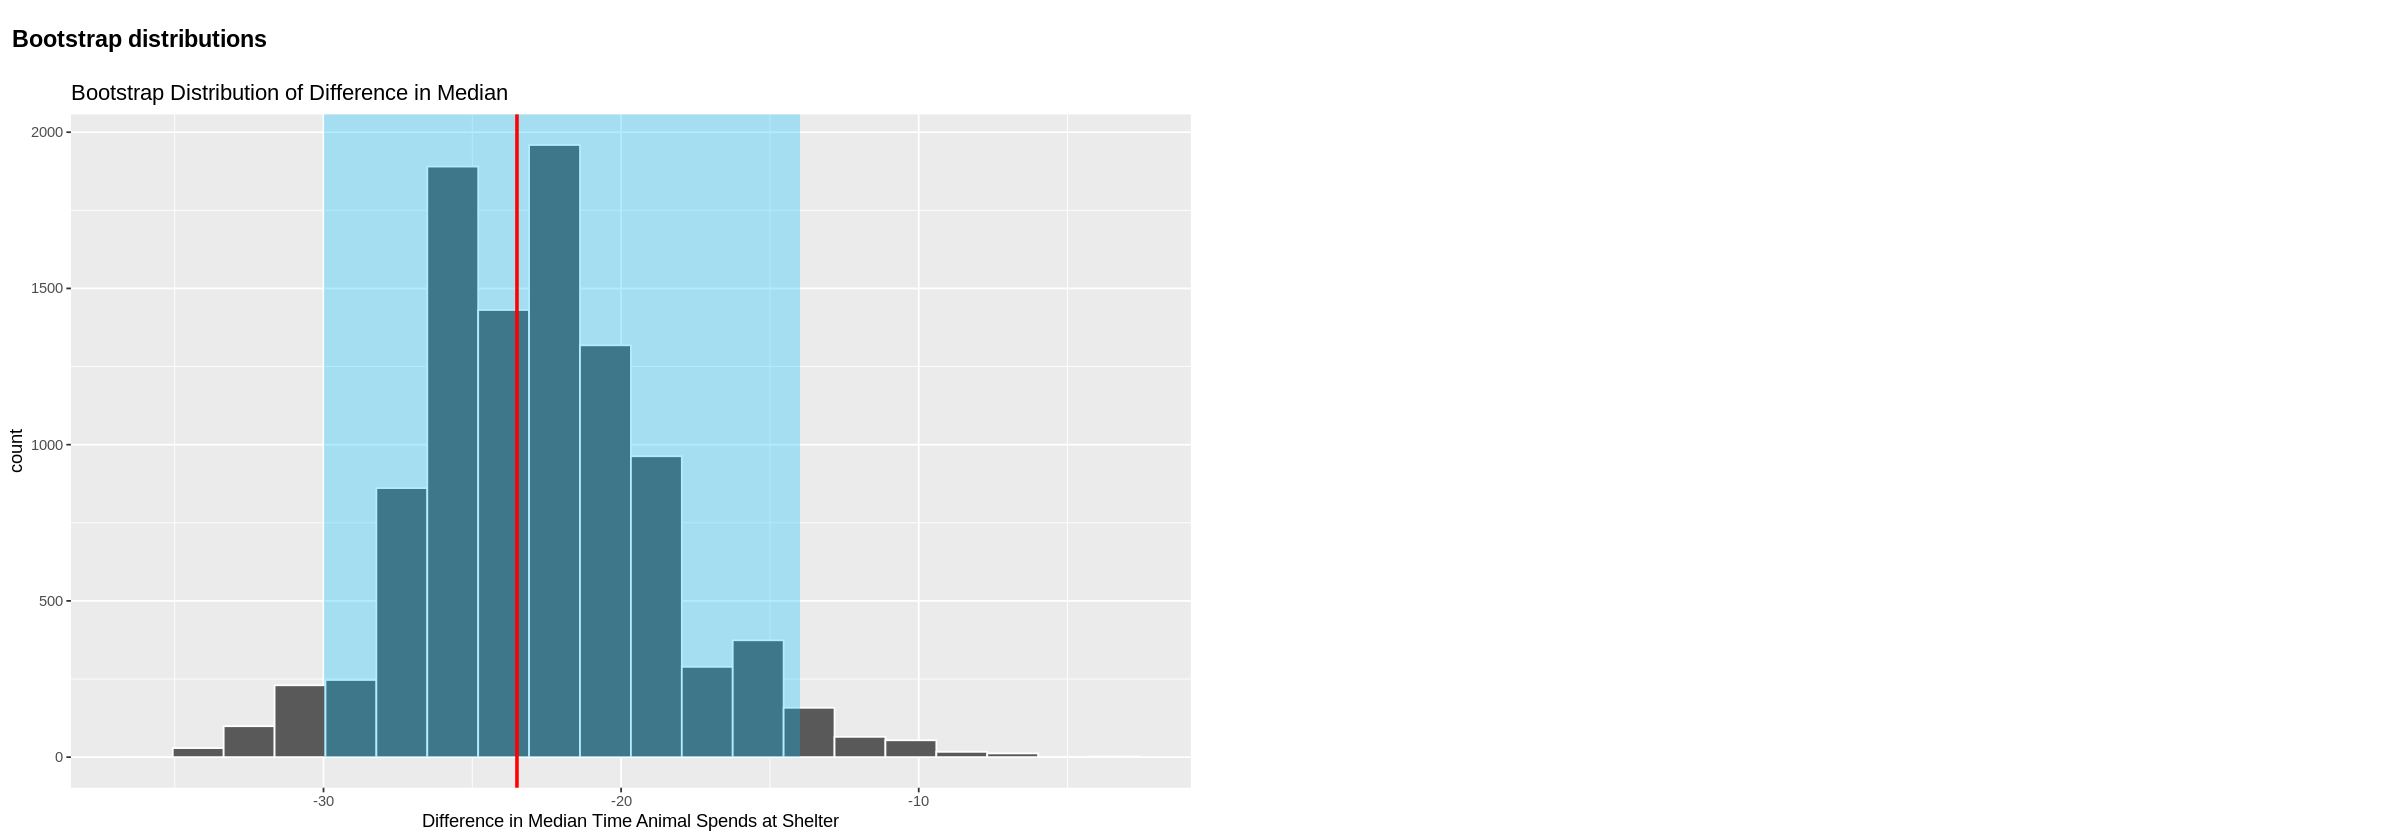

In [44]:
options(repr.plot.width = 20)

proportion_plot_row <- plot_grid(bootstrap_distribution +
                                 scale_x_continuous(limits = c(NA, NA)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Bootstrap distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

medians_grid

As shown by the graph and confidence interval, we can say with 95% confidence that the true difference in median shelter period for a dog and cat is [-30, -14]. This means that we are 95% confidence that dogs are adopted faster than cats within a range of 14 to 30 days which is a rather substantial difference. Now, we will compare this result to the CI for the mean.

### _CI for Difference in Means_

As we mentioned in our exploratory analysis, our two samples were heavily right skewed and contained many outliers. Thus, the mean of our cat and dog samples are heavily influenced by these outliers, so their values would not be the most useful measure of average. However, we still want to investigate the mean of the sample, especially in relation to median. Therefore, we first eliminate the presence of outliers, and then find the confidence intervals for the mean for the purposes of comparing the confidence intervals using the two different measures of average. In order to maintain consistency, we also use bootstrapping to construct the confidence intervals for the difference in means.

We first delete the outliers present in both the dogs and cats dataset.

In [45]:
# Q1 = 5.00 
# Q3 = 41.00
# IQR = 36.00
# outliers are > Q3 + 1.5IQR (upper fence) 
# below (<) Q1 - 1.5IQR (lower fence)

dog_filtered_outliers <- dog_sample_200 %>%
        filter(Shelter_Period < (41 + 1.5*36) & Shelter_Period > (5 - 1.5*36))

head(dog_filtered_outliers)

replicate,Animal_Type,Shelter_Period
<int>,<chr>,<dbl>
1,Dog,10
1,Dog,35
1,Dog,31
1,Dog,2
1,Dog,10
1,Dog,51


In [46]:
# Q1 = 8.75
# Q3 = 61.00
# IQR = 52.25
# outliers are > Q3 + 1.5IQR (upper fence) 
# below (<) Q1 - 1.5IQR (lower fence)

cat_filtered_outliers <- cat_sample_200 %>%
        filter(Shelter_Period < (61 + 1.5*52.25) & Shelter_Period > (8.75 - 1.5*52.25))


head(cat_filtered_outliers)

replicate,Animal_Type,Shelter_Period
<int>,<chr>,<dbl>
1,Cat,66
1,Cat,43
1,Cat,6
1,Cat,48
1,Cat,40
1,Cat,1


Using these samples, we create corresponding boxplots to look at the new spread of data.

In [47]:
options(repr.plot.width = 10)

#Dog sample boxplot without outliers
boxplot_no_outliers_dogs <- dog_filtered_outliers %>%
                            ggplot(aes(x = Animal_Type, y = Shelter_Period)) +
                            geom_boxplot() +
                            labs(x = "Dogs", y = "Shelter Period in Days", 
                                 title = "Time Dogs spent (Without original outliers)")

#Cat sample boxplot without outliers
boxplot_no_outliers_cats <- cat_filtered_outliers %>%
                            ggplot(aes(x = Animal_Type, y = Shelter_Period)) +
                            geom_boxplot() +
                            labs(x = "Cats", y = "Shelter Period in Days", 
                                 title = "Time Cats spent (Without original outliers)")

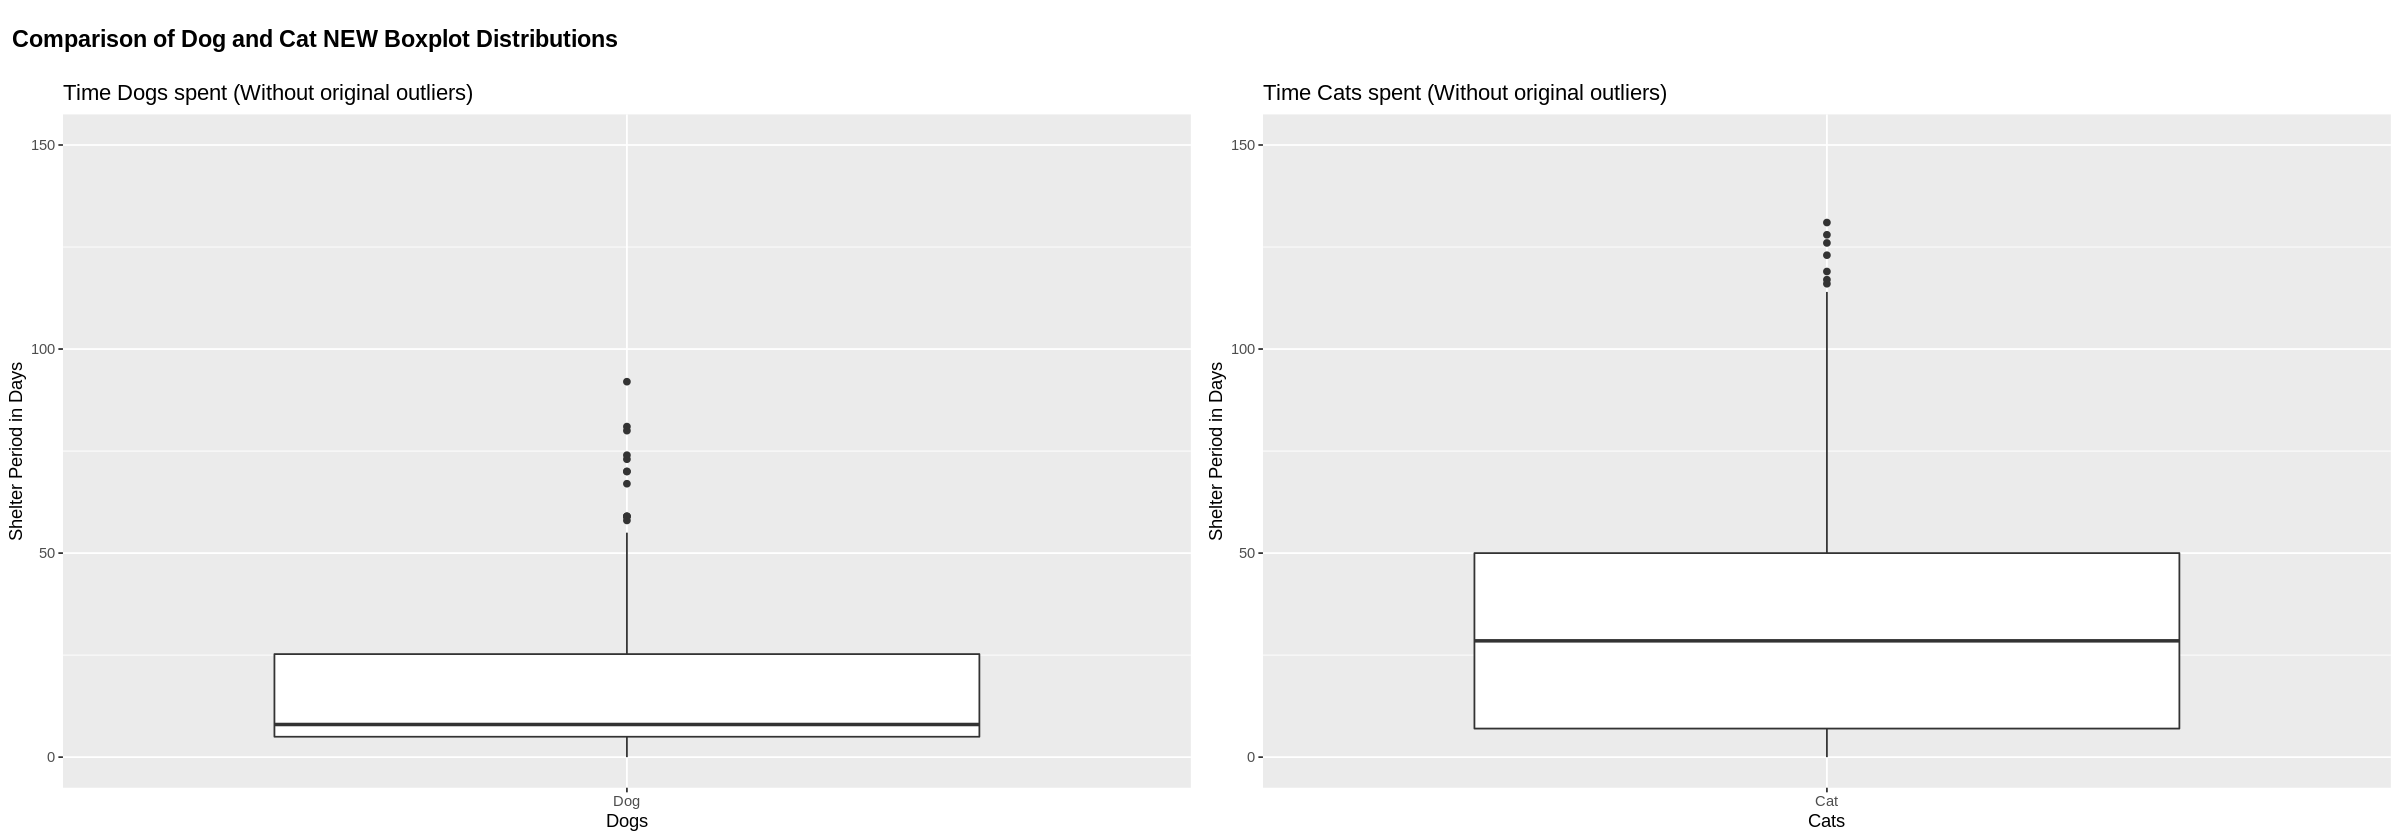

In [48]:
options(repr.plot.width = 20)

# Replotting Cat and Dog Boxplots side by side
proportion_plot_row <- plot_grid(boxplot_no_outliers_dogs +
                                 scale_y_continuous(limits = c(0, 150)),
                                 boxplot_no_outliers_cats +
                                 scale_y_continuous(limits = c(0, 150)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of Dog and Cat NEW Boxplot Distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

#Some points will not be plotted, in order to make comparison clearer
medians_grid

While the data is still right skewed, the most extreme values are gone, leading to larger IQRs in relation to the data outside the IQR. The cat and dog samples with outliers look as follows:

In [55]:
options(repr.plot.width = 10)

histogram_no_outliers_dogs <- dog_filtered_outliers %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 5) +
                            labs(x = "Shelter Period in Days", y = "Dogs",
                                 title = "Time Dogs spent (Without original outliers)")

histogram_no_outliers_cats <- cat_filtered_outliers %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 5) +
                            labs(x = "Shelter Period in Days", y = "Cats",
                                 title = "Time Cats spent (Without original outliers)")

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


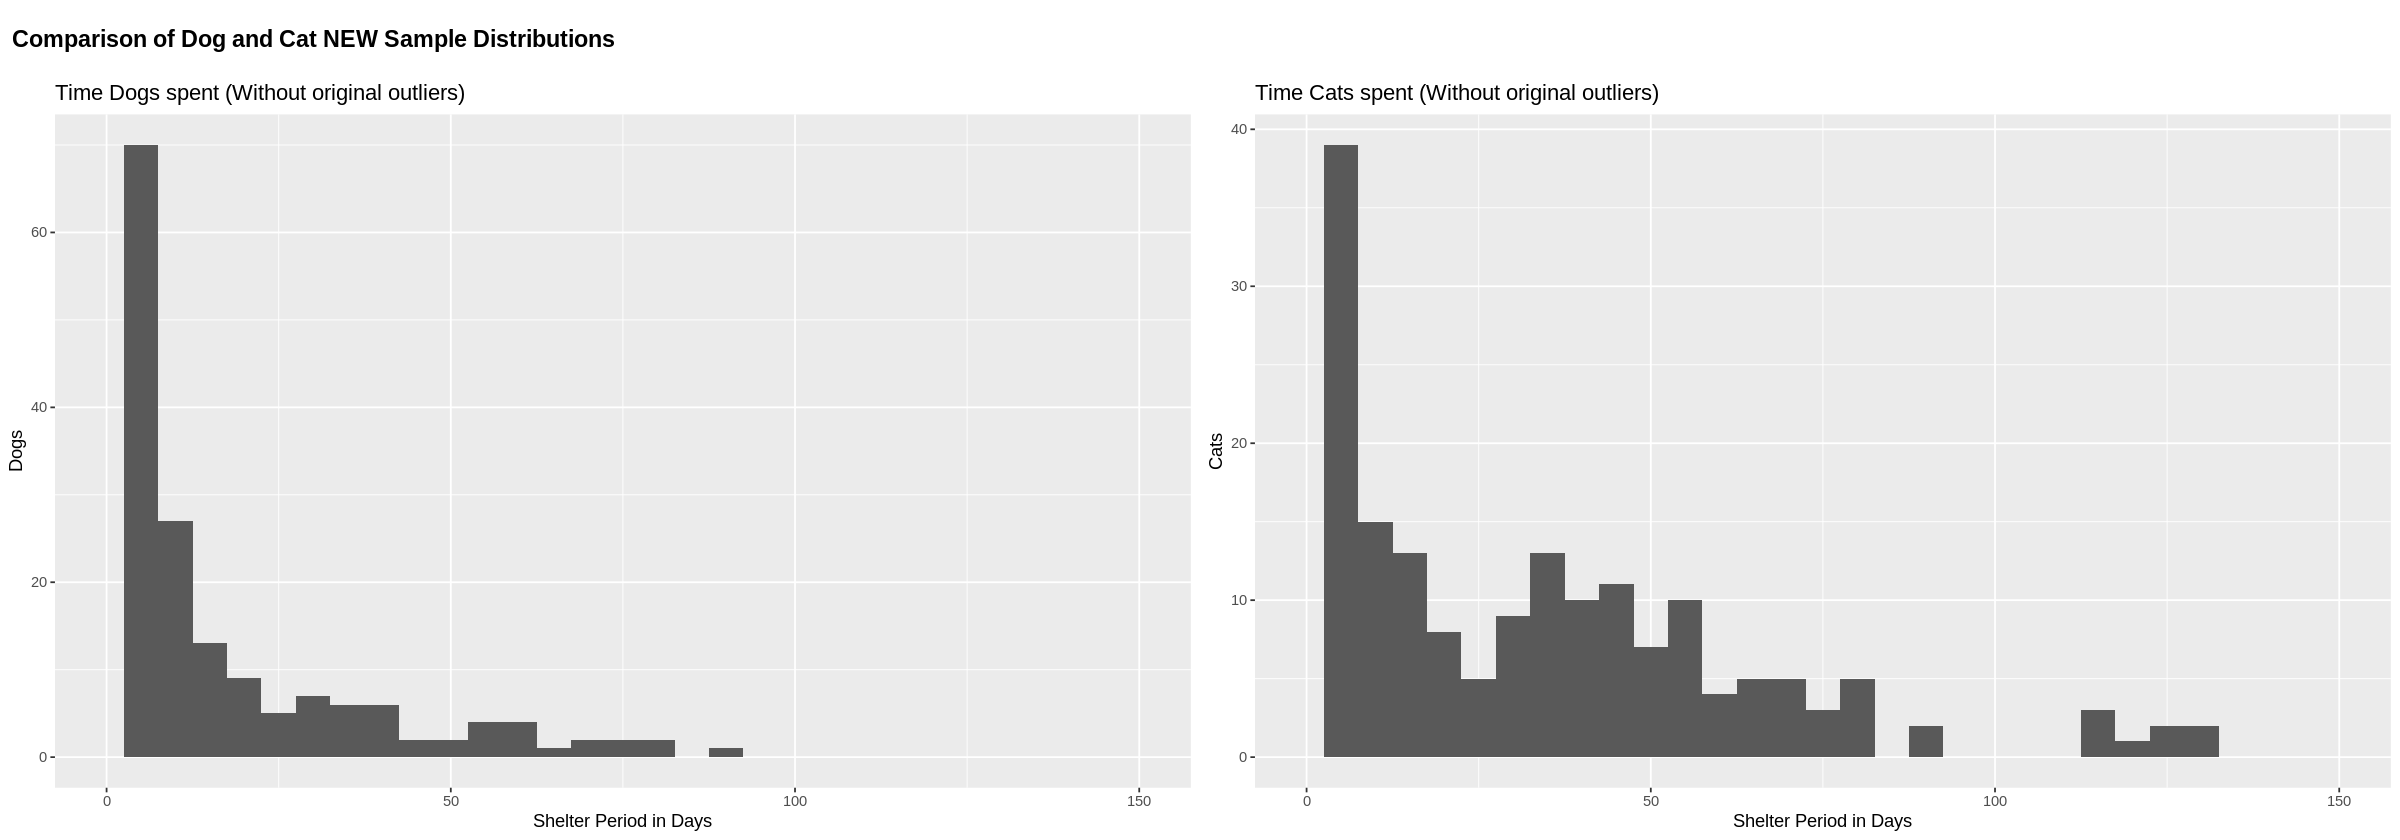

In [56]:
options(repr.plot.width = 20)

# Replotting Cat and Dog new histograms side by side
proportion_plot_row <- plot_grid(histogram_no_outliers_dogs +
                                 scale_x_continuous(limits = c(0, 150)),
                                 histogram_no_outliers_cats +
                                 scale_x_continuous(limits = c(0, 150)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of Dog and Cat NEW Sample Distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

#Some points will not be plotted, in order to make comparison clearer
medians_grid

In [51]:
#Dog: mean calculated
dog_mean <- dog_filtered_outliers %>%
    summarize(mean = mean(Shelter_Period)) %>%
    pull()

#Cat: mean calculated
cat_mean <- cat_filtered_outliers %>%
    summarize(mean = mean(Shelter_Period)) %>%
    pull()

diff_in_mean <- dog_mean - cat_mean

|        |    Dogs   |   Cats    | Diff in Point Estimates |
| -------- | --------- | --------- |--------- |
| Mean (days)   | 17.44 | 33.57 | -16.13 |
| Median (days)   | 10.00 | 33.50| -23.5|

| _Table # : Point Estimates of Samples *Without* Outliers_ |
| ------------------------ |
||

These samples have reasonable ranges which is reflected in the similarity of the means to the medians, as the outliers have not heavily increased the mean. As such, we can determine useful information off the confidence intervals of the difference in means of these two samples.

A bootstrap distribution with the same 95% confidence interval will be created for the difference in means in order to compare with the difference in medians.

In [52]:
# Difference in MEAN Sampling Distribution + Confidence Intervals (1000 repetition, 200 samples)
options(repr.plot.width = 10)
set.seed(310)

# Dog&Cat: Compute resulting 10,000 replicates of mean
animal_sample <- rbind(dog_filtered_outliers, cat_filtered_outliers)

# Dog&Cat: resamples size 200, repetition 10,000
bootstrap <- animal_sample %>%
    specify(formula = Shelter_Period ~ Animal_Type) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Dog","Cat"))

bootstrap_ci <- bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

bootstrap_ci
sprintf("Difference in means Confidence Interval: %s to %s", bootstrap_ci$lower_ci, bootstrap_ci$upper_ci)

lower_ci,upper_ci
<dbl>,<dbl>
-21.48209,-10.85272


[1] "Difference in means Confidence Interval: -21.4820930667583 to -10.8527189842977"

In [53]:
bootstrap_distribution <- bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = bootstrap_ci$lower_ci, xmax = bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = diff_in_mean, size = 1, color = "red") +
    labs(x = "Difference in Mean Time Animal Spends at Shelter", title = "Bootstrap Distribution of Difference in Mean")


The following bootstrap distribution is plotted with its CI and difference in mean values together:

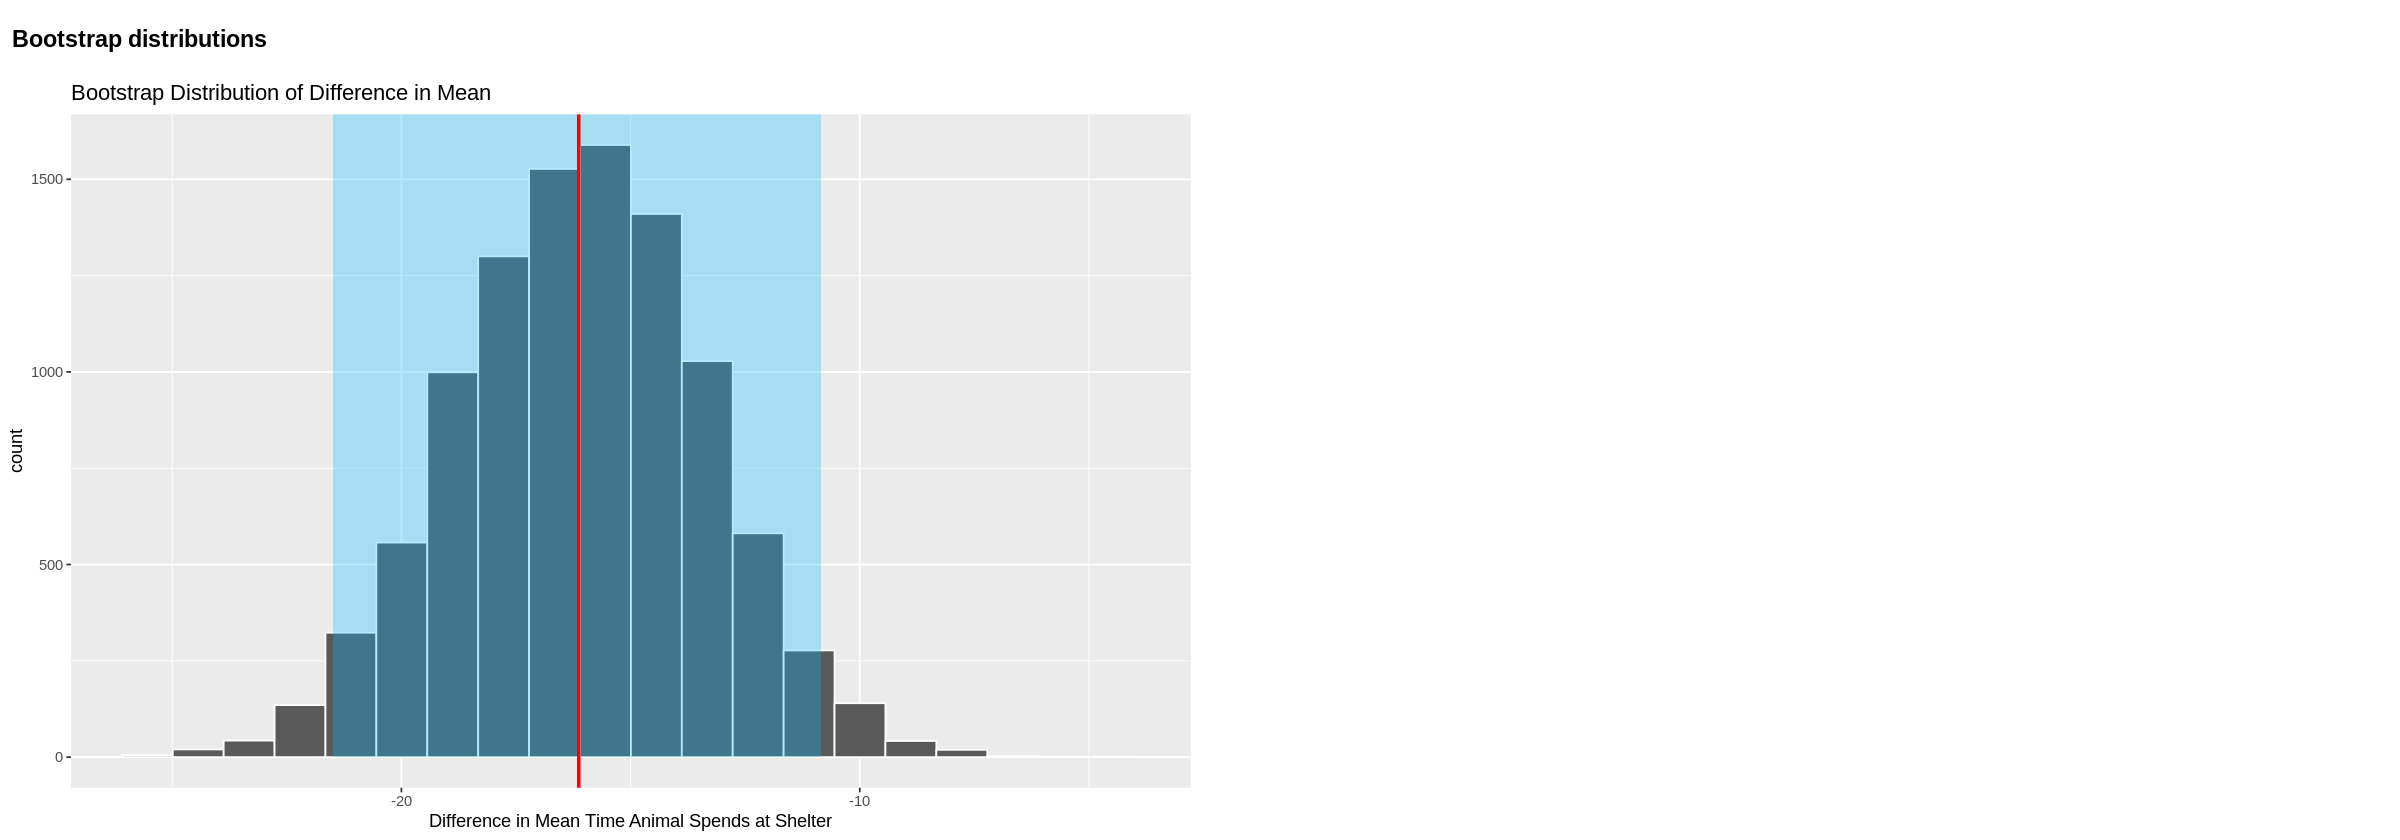

In [54]:
options(repr.plot.width = 20)

proportion_plot_row <- plot_grid(bootstrap_distribution +
                                 scale_x_continuous(limits = c(NA, NA)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Bootstrap distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

medians_grid

As shown by the graph and confidence interval, we can say with 95% confidence that the true difference in mean shelter period for a dog and cat is between [-21.48, -10.85] while the 95% confidence interval for the difference in medians is [-30, -14]. Interestingly, the CI for the difference in mean adoption times is smaller than the CI for the difference in medians. This suggests that despite the fact that the median is a measure less affected by outliers, it may have still been affected due to how skewed the data was which may have contributed to the wider confidence interval. Overall, both confidence intervals establish that dogs are indeed adopted faster than dogs, with the true value likely being above ten days faster regardless of the which interval you look at.



# **_Discussion_**

# **_References_**
